<a href="https://colab.research.google.com/github/dusicagolubovic/ri-minimal-coloring-sum/blob/master/RiVezbe10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from keras.models import Sequential
from sklearn import datasets
from keras.layers import Dense, Dropout
from keras import losses, optimizers
from keras import regularizers
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt


In [26]:
data = datasets.load_breast_cancer()
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data.data,data.target,test_size = 0.33)
# skaliramo podatke 
scaler = preprocessing.StandardScaler() 
scaler.fit(X_train) # naucimo na treningu
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train) 
model = Sequential()
#model.add(Dense(units=50,input_dim=X_train.shape[1],activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dense(units=50,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss=losses.binary_crossentropy,metrics=['accuracy'])
model.summary()
history = model.fit(X_train,Y_train,epochs=20,verbose=1,validation_split=0.3,batch_size=16)
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                1550      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 21        
Total params: 2,591
Trainable params: 2,591
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
17/17 [==============================] - 1s 13ms/step - loss: 0.6676 - accuracy: 0.6096 - val_loss: 0.3876 - val_accuracy: 0.9478
Epoch 2/20
17/17 [==============================] - 0s 16ms/step - loss: 0.4024 - accuracy: 0.8982 - val_loss

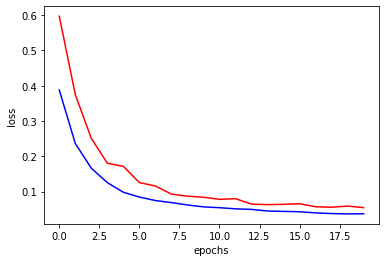

In [27]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,loss,c="red")
plt.plot(epochs,validation_loss,c="blue")
plt.show()



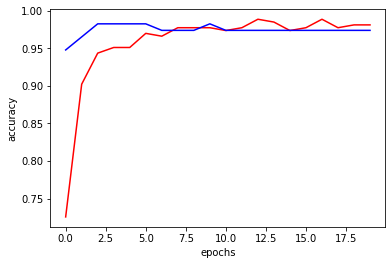

In [28]:
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs,acc,c="red")
plt.plot(epochs,val_acc,c="blue")
plt.show()

# Doslo je do overfittovanja!!!

In [29]:
test_loss,test_acc = model.evaluate(X_test,Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9681


Primer 2

In [30]:
from keras.datasets import boston_housing

In [32]:
data = boston_housing.load_data(test_split=0.33)
(X_train,Y_train),(X_test,Y_test) = data

In [33]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = Sequential()
model.add(Dense(units = 100,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=30,verbose=1,validation_split=0.2)


Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 573.8752 - val_loss: 613.4955
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 516.8184 - val_loss: 593.2386
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 512.2021 - val_loss: 572.9235
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 508.2144 - val_loss: 551.8657
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 471.2042 - val_loss: 530.5534
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 441.7140 - val_loss: 507.1524
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 442.1920 - val_loss: 482.8943
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 394.5471 - val_loss: 456.2718
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 384.8052 - val_loss: 428.5852
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss

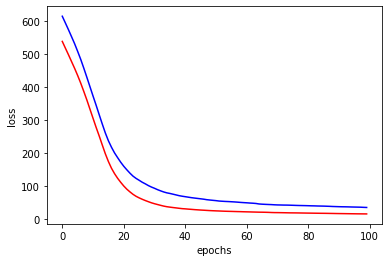

In [42]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,loss,c="red")
plt.plot(epochs,val_loss,c="blue")
plt.show()
